In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA EXPLORATION

In [2]:
df = pd.read_csv("D:\DS PROJECT\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
#Shape of the data
df.shape

(6362620, 11)

In [4]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#Description of data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
#Checking for Null values
print('Null Values:',df.isnull().values.any())

Null Values: False


#### Distribution of the Transaction Type column

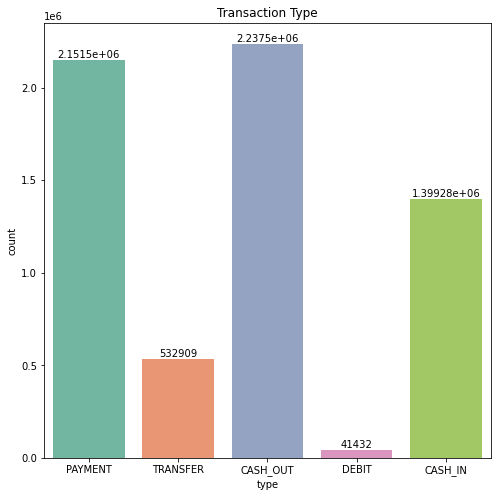

In [7]:
#Visualization
fig, ax=plt.subplots(1,1, figsize=(8,8))
sns.countplot(x=df.type, palette="Set2",ax=ax).set_title("Transaction Type")
ax.bar_label(ax.containers[0])
plt.show()

#### Pie chart to visualize the percentage distribution of each class

Text(0.5, 1.0, 'Percentage distribution of each transaction type')

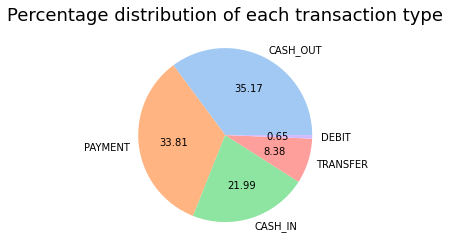

In [8]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['type'].value_counts(), labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'],colors=colors, autopct='%.2f')
plt.title('Percentage distribution of each transaction type', fontsize=18)

#### Fraud Dataset And Valid Dataset

In [9]:
#Fraud and non-Fraud Distribution
fraud = df[df['isFraud']==1]
valid = df[df['isFraud']==0]
print("Fraud:",fraud.shape)
print("Valid:",valid.shape)

Fraud: (8213, 11)
Valid: (6354407, 11)


#### Relation between the Fraud Transaction and the Transactions Flagged by the system

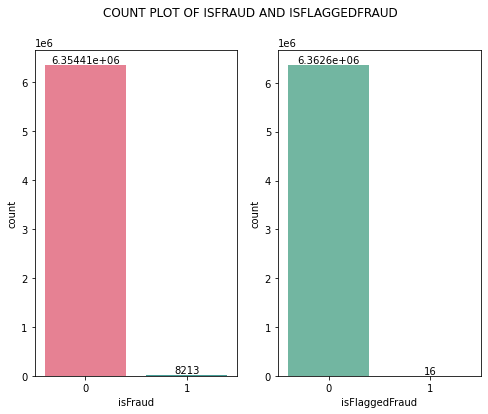

In [10]:
# chart for label class
plt.figure(figsize=(8,6))

plt.subplot(121)
ax = sns.countplot(data=df, x='isFraud',palette="husl")
ax.bar_label(ax.containers[0])

plt.subplot(122)
ax = sns.countplot(data=df, x='isFlaggedFraud',palette="Set2")
ax.bar_label(ax.containers[0])

plt.suptitle('COUNT PLOT OF ISFRAUD AND ISFLAGGEDFRAUD')
plt.show()

#### Fraud Transactions and Transaction types

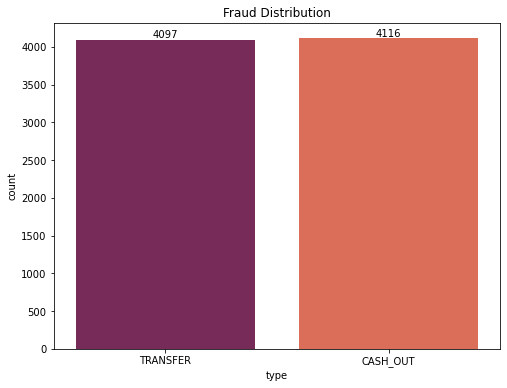

In [11]:
plt.figure(figsize=(8,6))
ax=sns.countplot('type', data=fraud,palette="rocket")
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('Fraud Distribution')
plt.show()

##### INFERENCES:¶

From the above graph we can see that the Fraudulent transfers are from TRANSFER(4097) and CASH_OUT(4116), transaction types.

#### Flagged As Fraud per transaction

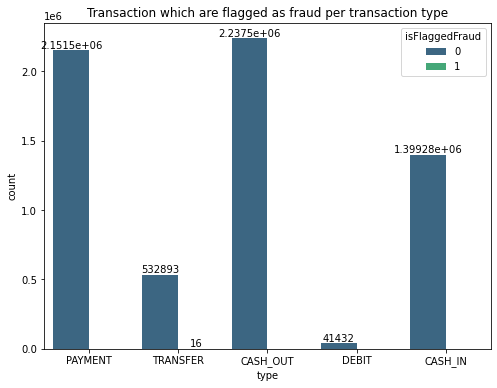

In [12]:
# Count of the type feature
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='type', hue='isFlaggedFraud',palette="viridis")
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title("Transaction which are flagged as fraud per transaction type")
plt.show()

##### INFERENCES:

From the above graph we can see that the money transfers that are flagged fraud are from TRANSFER Transaction type. So out of 4097 only 16 were Flagged Fraud by the system.

However, only 16 out of 6 million transactions were flagged by the system. It is safe to say that the system uses an unreasonable parameter to detect fraud transactions.

#### Dealing with Account Ids 'nameOrig' and 'nameDest'

In [13]:
print("All Transactions ID:", df['nameOrig'].size)
print("Unique Transactions ID:", df['nameOrig'].unique().size)
print('Transactions from existing accounts: ',df['nameOrig'].size-df['nameOrig'].unique().size)

All Transactions ID: 6362620
Unique Transactions ID: 6353307
Transactions from existing accounts:  9313


In [14]:
print("All Transactions ID:", df['nameDest'].size)
print("Unique Transactions ID:", df['nameDest'].unique().size)
print("Transactions from existing accounts:",df['nameDest'].size-df['nameOrig'].unique().size)

All Transactions ID: 6362620
Unique Transactions ID: 2722362
Transactions from existing accounts: 9313


##### CONCLUSION:

We do not get any beneficial information from the nameOrig or nameDest, so we'll be dropping these columns.

#### Taking note of the Step Feature

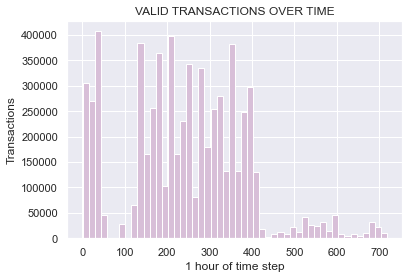

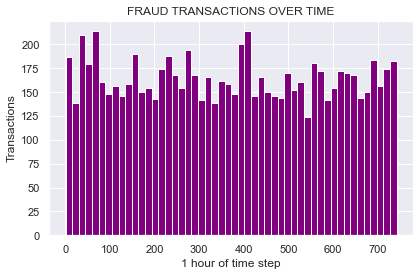

In [15]:
#Time Patterns
sns.set_theme(style="darkgrid")
bins = 50
valid.hist(column="step", color="thistle", bins=bins)
plt.xlabel("1 hour of time step")
plt.ylabel("Transactions")
plt.title("VALID TRANSACTIONS OVER TIME")

fraud.hist(column="step", color="purple", bins=bins)
plt.xlabel("1 hour of time step")
plt.ylabel("Transactions")
plt.title("FRAUD TRANSACTIONS OVER TIME")

plt.tight_layout()
plt.show()

##### INFERENCE:

1.A lot of VALID TRANSACTIONS occur during 0 to 60 hours and then again 120 to 400 hours.

2.The FRAUD TRANSACTIONS don't change much throughout the time frame.

#### Feature Engineering and Data Cleaning

As We know Dataset is totally Biased, 8231 are fraud transactions(minority class) where as remainings are non fraud transactions(majority class). However We are trying to make content small so that we could balanced the dataset. Hence we are going to take 12000 data from each type(Payment,Transfer,Cash_out,Debit,Cash_in) which is non fraud and will make one dataframe of fraud data i.e 8231 and we will combine all the dataframe to perform further steps.

In [16]:
fraud = df[df['isFraud']==1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [17]:
transfer = df[(df['type']=='TRANSFER') & (df['isFraud']==0)]
transfer1=transfer.head(12000)
transfer1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.00,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.00,C1761291320,94900.00,22233.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...
142949,11,TRANSFER,689978.77,C1207589610,166088.00,0.00,C1005856130,10870.00,700848.77,0,0
142964,11,TRANSFER,216388.35,C942594959,462358.00,245969.65,C778384023,0.00,216388.35,0,0
142966,11,TRANSFER,2130918.93,C188286369,745503.96,0.00,C2018751567,0.00,2130918.93,0,0
142997,11,TRANSFER,2023924.17,C1540907040,545456.09,0.00,C173961721,2178730.76,4202654.93,0,0


In [18]:
payment = df[(df['type']=='PAYMENT') & (df['isFraud']==0)]
payment1=payment.head(12000)
payment1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24108,8,PAYMENT,13802.70,C1653572480,56710.00,42907.30,M2087721404,0.0,0.0,0,0
24110,8,PAYMENT,1942.96,C1427144523,274.00,0.00,M1260221930,0.0,0.0,0,0
24112,8,PAYMENT,6402.51,C1299972350,99926.00,93523.49,M465622077,0.0,0.0,0,0
24113,8,PAYMENT,11738.52,C1003638922,17829.85,6091.33,M1830688100,0.0,0.0,0,0


In [19]:
cash_out = df[(df['type']=='CASH_OUT') & (df['isFraud']==0)]
cash_out1 = cash_out.head(12000)
cash_out1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45560,9,CASH_OUT,398135.92,C1956662442,0.00,0.0,C1423983240,549002.09,947138.01,0,0
45561,9,CASH_OUT,173296.72,C1399983549,11961.00,0.0,C685786661,150393.07,323689.79,0,0
45562,9,CASH_OUT,134749.83,C735655415,0.00,0.0,C1102319340,10388343.43,10523093.26,0,0
45564,9,CASH_OUT,260556.81,C1533020913,4846.00,0.0,C397672119,0.00,260556.81,0,0


In [20]:
debit = df[(df['type']=='DEBIT') & (df['isFraud']==0)]
debit1 = debit.head(12000)
debit1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0,0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0,0
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.00,0.00,0,0
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.00,16997.22,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1832908,163,DEBIT,34791.71,C1495384278,22309.0,0.00,C1623181854,404097.91,438889.62,0,0
1833413,163,DEBIT,5359.39,C1366381782,102439.0,97079.61,C1351586913,32459.15,37818.54,0,0
1833577,163,DEBIT,6476.81,C374254767,3835.0,0.00,C1778727790,996802.90,1003279.71,0,0
1833583,163,DEBIT,13872.04,C383929568,16070.0,2197.96,C352914906,5254379.71,5268251.76,0,0


In [21]:
cash_in = df[(df['type']=='CASH_IN') & (df['isFraud']==0)]
cash_in1 = cash_in.head(12000)
cash_in1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
63673,9,CASH_IN,60925.49,C569900309,8611069.67,8671995.16,C456930332,145527.37,18246.61,0,0
63674,9,CASH_IN,46388.49,C697840884,8671995.16,8718383.65,C352211689,81999.93,35611.44,0,0
63675,9,CASH_IN,122487.44,C258282341,8718383.65,8840871.10,C1910963690,204940.81,0.00,0,0
63676,9,CASH_IN,327979.11,C248222613,8840871.10,9168850.21,C459857341,329646.12,320251.43,0,0


In [22]:
data = pd.concat([transfer1,payment1,cash_out1,debit1,cash_in1,fraud], axis=0)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [23]:
#We do not get any beneficial information from the nameOrig or nameDest. Hence, we'll be dropping these columns.
data1 = data.drop(['nameOrig','nameDest'],axis=1)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


#### Taking note of the balances before and after transactions

##### As most of the transactions has errors in showing the account balances before and after transaction, we calculate the error

In [24]:
zero_balance = list(data.loc[(data1.oldbalanceOrg == 0) & (data1.newbalanceOrig == 0) & (data1.amount != 0)].type.values)

print('Number of transcation where oldbalanceorig & newbalanceorig is zero but amount of transaction is not zero :{}'.format(len(zero_balance)))


Number of transcation where oldbalanceorig & newbalanceorig is zero but amount of transaction is not zero :17098


In [25]:
print('number of recipients who have newbalanceDest and oldbalanceDest is zero :{}'
      .format(len(data1.loc[(data1.newbalanceDest == 0) & (data1.oldbalanceDest == 0) ].values)))

number of recipients who have newbalanceDest and oldbalanceDest is zero :16831


#### Taking note of the balances before and after transactions

##### As most of the transactions has errors in showing the account balances before and after transaction, we calculate the error

In [26]:
data1['origin_bal_change'] = data1['oldbalanceOrg'] - data1['newbalanceOrig']
data1['dest_bal_increase'] = data1['newbalanceDest'] - data1['oldbalanceDest']
data1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_increase
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0,705.00,-22425.00
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,10835.00,2712905.89
58,1,TRANSFER,62610.80,79114.00,16503.2,517.00,8383.29,0,0,62610.80,7866.29
78,1,TRANSFER,42712.39,10363.39,0.0,57901.66,24044.18,0,0,10363.39,-33857.48
79,1,TRANSFER,77957.68,0.00,0.0,94900.00,22233.65,0,0,0.00,-72666.35
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0,339682.13,339682.13
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0,850002.52,0.00


#### Converting the step feature from hours into days

In [27]:
num_days = 7
num_hours = 24
fraud_days = fraud.step % num_days
fraud_hours = fraud.step % num_hours
valid_days = valid.step % num_days
valid_hours = valid.step % num_hours

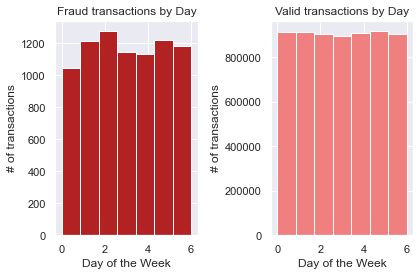

In [28]:
# plotting scatterplot of the days of the week, 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="firebrick")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="lightcoral")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

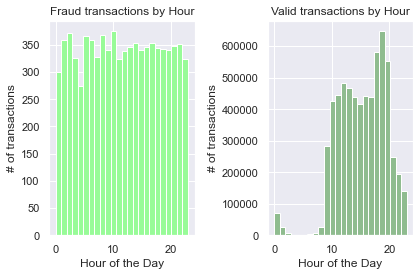

In [29]:
# plotting scatterplot of the hours of days, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="palegreen")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="darkseagreen")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

##### INFERENCE:

From the graphs above, there is strong evidence to suggest that from hour 0 to hour 9, valid transactions very rarely occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9.

So I will add a new feature hour_of_day which is just the [(step column) %24]

In [30]:
data1['HourOfDay'] = np.nan # initializing feature column
data1.HourOfDay = data1['step'].apply(lambda i: i/24)
data1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0,705.00,-22425.00,0.041667
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,10835.00,2712905.89,0.041667
58,1,TRANSFER,62610.80,79114.00,16503.2,517.00,8383.29,0,0,62610.80,7866.29,0.041667
78,1,TRANSFER,42712.39,10363.39,0.0,57901.66,24044.18,0,0,10363.39,-33857.48,0.041667
79,1,TRANSFER,77957.68,0.00,0.0,94900.00,22233.65,0,0,0.00,-72666.35,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0,339682.13,339682.13,30.958333
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0,6311409.28,0.00,30.958333
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,6311409.28,6311409.27,30.958333
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0,850002.52,0.00,30.958333


#### Heat Map

<AxesSubplot:>

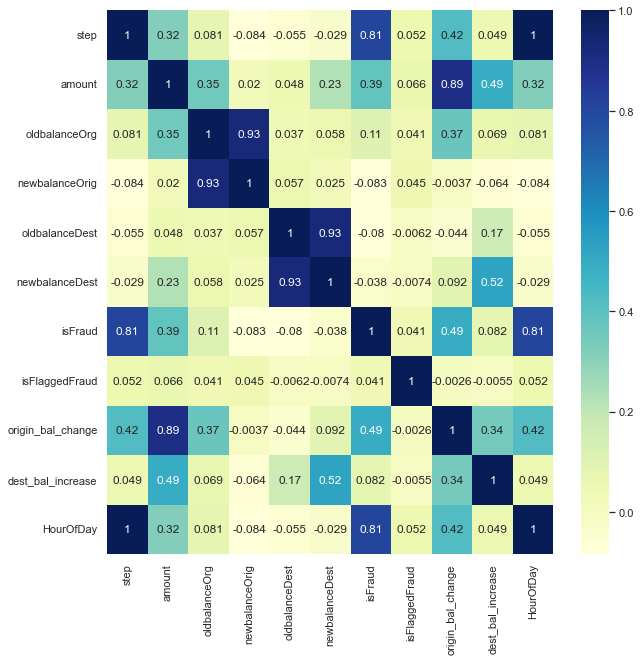

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="YlGnBu")

#### DATA PREPARATION

##### We apply Label_encoding to convert string datatype into float datatype

In [32]:
#Converting string datatypes into float datatypes
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data1['type'] = label_encoder.fit_transform(data1['type']) 
data1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
19,1,4,215310.30,705.00,0.0,22425.00,0.00,0,0,705.00,-22425.00,0.041667
24,1,4,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,10835.00,2712905.89,0.041667
58,1,4,62610.80,79114.00,16503.2,517.00,8383.29,0,0,62610.80,7866.29,0.041667
78,1,4,42712.39,10363.39,0.0,57901.66,24044.18,0,0,10363.39,-33857.48,0.041667
79,1,4,77957.68,0.00,0.0,94900.00,22233.65,0,0,0.00,-72666.35,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1,0,339682.13,339682.13,30.958333
6362616,743,4,6311409.28,6311409.28,0.0,0.00,0.00,1,0,6311409.28,0.00,30.958333
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,6311409.28,6311409.27,30.958333
6362618,743,4,850002.52,850002.52,0.0,0.00,0.00,1,0,850002.52,0.00,30.958333


<AxesSubplot:>

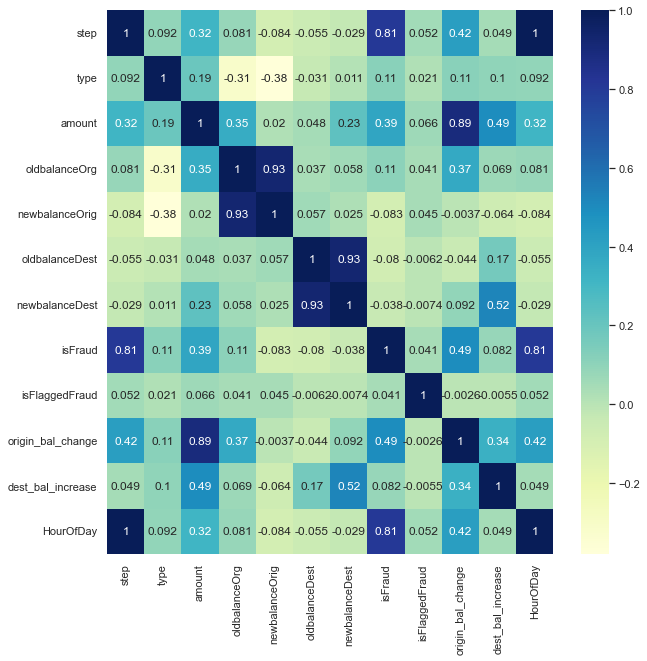

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [34]:
data1.type.value_counts()

1    16116
4    16097
3    12000
2    12000
0    12000
Name: type, dtype: int64

In [35]:
#Importing Packages
from random import seed, sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X = data1.drop(["isFraud","step"], axis=1)
Y = data1.isFraud

In [37]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
19,4,215310.30,705.00,0.0,22425.00,0.00,0,705.00,-22425.00,0.041667
24,4,311685.89,10835.00,0.0,6267.00,2719172.89,0,10835.00,2712905.89,0.041667
58,4,62610.80,79114.00,16503.2,517.00,8383.29,0,62610.80,7866.29,0.041667
78,4,42712.39,10363.39,0.0,57901.66,24044.18,0,10363.39,-33857.48,0.041667
79,4,77957.68,0.00,0.0,94900.00,22233.65,0,0.00,-72666.35,0.041667
...,...,...,...,...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.0,0.00,339682.13,0,339682.13,339682.13,30.958333
6362616,4,6311409.28,6311409.28,0.0,0.00,0.00,0,6311409.28,0.00,30.958333
6362617,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,0,6311409.28,6311409.27,30.958333
6362618,4,850002.52,850002.52,0.0,0.00,0.00,0,850002.52,0.00,30.958333


In [38]:
Y

19         0
24         0
58         0
78         0
79         0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 68213, dtype: int64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [40]:
#Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

#Fit only to the training data
scaler.fit(x_train)

#Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (54570, 10)
Shape of x_test: (13643, 10)
Shape of y_train: (54570,)
Shape of y_test: (13643,)


<AxesSubplot:title={'center':'COUNT OF FRAUDULENT VS NON-FRAUDULENT TRANSACTIONS'}, xlabel='isFraud'>

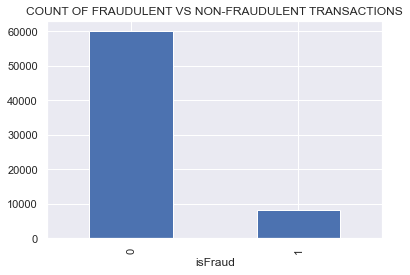

In [42]:
pd.Series(Y).value_counts().plot(kind='bar',title='COUNT OF FRAUDULENT VS NON-FRAUDULENT TRANSACTIONS', xlabel='isFraud')


#### MODEL SELECTION

#### Model1: LOGISTIC REGRESSION

In [43]:
#Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_score
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [44]:
#Predicting on Train data
predt_log = classifier.predict(x_train)
#Accuracy on Train data
print("Train data Accuracy is:", np.mean(predt_log==y_train))

Train data Accuracy is: 0.9840388491845337


In [45]:
#Predicting on test data
preds1 = classifier.predict(x_test)
#Accuracy on Test data
print("Test data Accuracy is:", np.mean(preds1==y_test))

Test data Accuracy is: 0.9843143003738181


In [46]:
# Evaluating model
CM_log = confusion_matrix(y_test,preds1)
CM_log

array([[11966,    22],
       [  192,  1463]], dtype=int64)

In [47]:
CR_log=classification_report(preds1,y_test)
print(CR_log)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12158
           1       0.88      0.99      0.93      1485

    accuracy                           0.98     13643
   macro avg       0.94      0.98      0.96     13643
weighted avg       0.99      0.98      0.98     13643



#### Model 2: Decision Tree

In [48]:
#Importing packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#Train Model
DT = DecisionTreeClassifier()
model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

No. Of Leaves: 63


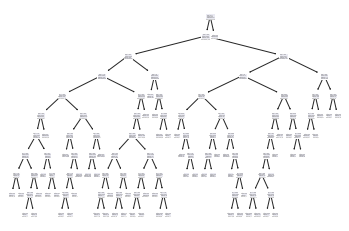

In [49]:
#PLot the Decision Tree
tree.plot_tree(model1);
print("No. Of Leaves:",model1.get_n_leaves())

In [50]:
#Predicting on test data
preds2= model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(preds2==y_test))

Test data Accuracy is: 0.9983141537784944


In [51]:
# Evaluating model
CM_2 = confusion_matrix(y_test,preds2)
CM_2

array([[11981,     7],
       [   16,  1639]], dtype=int64)

In [52]:
CR_2=classification_report(preds2,y_test)
print(CR_2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11997
           1       0.99      1.00      0.99      1646

    accuracy                           1.00     13643
   macro avg       0.99      1.00      1.00     13643
weighted avg       1.00      1.00      1.00     13643



#### Model 3: Random Forest

In [53]:
# Random Forest Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Train model
parametersRF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
model_3 = RF.fit(x_train, y_train)
 
# Predict on testing set
preds_3 = RF.predict(x_test)
 
     
fprRF, recallRF, thresholdsRF = roc_curve(y_test, preds_3)
AUC_rf = auc(fprRF, recallRF)

resultsRF = {"Area Under Curve":AUC_rf}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Area Under Curve : 
 0.9933117659452


In [55]:
# Evaluating model
CM_3 = confusion_matrix(y_test,preds_3)
CM_3

array([[11987,     1],
       [   22,  1633]], dtype=int64)

In [56]:
CR_3=classification_report(y_test,preds_3)
print(CR_3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11988
           1       1.00      0.99      0.99      1655

    accuracy                           1.00     13643
   macro avg       1.00      0.99      1.00     13643
weighted avg       1.00      1.00      1.00     13643



#### Model 4: XGBoost Classifier

In [57]:
from xgboost import XGBClassifier 
# Training model
model4 = XGBClassifier()
model4.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [58]:
#Predicting on train data
preds4= model4.predict(x_test)
#Accuracy on train data
print('Test data Accuracy is:',np.mean(preds4==y_test))

Test data Accuracy is: 0.9988272374111266


In [59]:
# Evaluating model
CM_4 = confusion_matrix(y_test,preds4)
CM_4

array([[11986,     2],
       [   14,  1641]], dtype=int64)

In [60]:
CR_4=classification_report(preds4,y_test)
print(CR_4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12000
           1       0.99      1.00      1.00      1643

    accuracy                           1.00     13643
   macro avg       1.00      1.00      1.00     13643
weighted avg       1.00      1.00      1.00     13643



#### Model 5: Light GBM Classifier

In [61]:
import lightgbm as lgb
model5 = lgb.LGBMClassifier()
model5.fit(x_train,y_train)

LGBMClassifier()

In [62]:
#Predicting on Test data
preds5 = model5.predict(x_test)
#Accuracy on Test data
print('Test data Accuracy is:',np.mean(preds5==y_test))

Test data Accuracy is: 0.9989005350729312


In [63]:
# Evaluating model
CM_5 = confusion_matrix(y_test,preds5)
CM_5

array([[11987,     1],
       [   14,  1641]], dtype=int64)

In [64]:
CR_5=classification_report(preds5,y_test)
print(CR_5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12001
           1       0.99      1.00      1.00      1642

    accuracy                           1.00     13643
   macro avg       1.00      1.00      1.00     13643
weighted avg       1.00      1.00      1.00     13643



#### Model 6: K-Fold Cross Validation

In [65]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
logreg=LogisticRegression()
skf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=skf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.95316279 0.78626402 0.93835667 0.93996481 0.98966427]
Average Cross Validation score :0.9214825130702433


#### Model 7: Gaussian Navie Bayes

In [66]:
#Importing Libraries
from sklearn.naive_bayes import GaussianNB as GB
classifier_gb = GB()
classifier_gb.fit(x_train,y_train)

GaussianNB()

In [67]:
#Predicting on test data
preds6 = classifier_gb.predict(x_test)
#Accuracy on Test data
print("Test data Accuracy is:", np.mean(preds6==y_test))

Test data Accuracy is: 0.967602433482372


In [68]:
# Evaluating model
CM_6 = confusion_matrix(y_test,preds6)
CM_6

array([[11875,   113],
       [  329,  1326]], dtype=int64)

In [69]:
CR_6=classification_report(preds6,y_test)
print(CR_6)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12204
           1       0.80      0.92      0.86      1439

    accuracy                           0.97     13643
   macro avg       0.90      0.95      0.92     13643
weighted avg       0.97      0.97      0.97     13643



#### Model 8: K-Fold Cross Validation

In [70]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
logreg=LogisticRegression()
skf=StratifiedKFold(n_splits=5)
score_k=cross_val_score(logreg,x_test,y_test,cv=skf)
print("Cross Validation Scores are {}".format(score_k))
print("Average Cross Validation score :{}".format(score_k.mean()))

Cross Validation Scores are [0.98021253 0.98387688 0.98351044 0.98460411 0.98497067]
Average Cross Validation score :0.983434926696963


#### Model 9: AdaBoost Classification

In [71]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=96)
preds8=clf.fit(x_test,y_test)
print("Test data Accuracy:",preds8.score(x_test,y_test))
score=cross_val_score(clf,x_test,y_test)
print("Cross Validation Scores are {}".format(score))

Test data Accuracy: 0.9978010701458624
Cross Validation Scores are [0.9989007  0.99633565 0.99633565 0.99743402 0.99780059]


#### Model 9: Baggigng Classification

In [72]:
from sklearn.ensemble import BaggingClassifier
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results_bag = cross_val_score(model, x_test, y_test, cv=kfold)
print(results_bag.mean())

0.9972878197071747


#### Comparing the models: UnBalanced data

In [73]:
print("Accuracy of Logistic Regression:",np.mean(preds1==y_test))
print("Accuracy of Decision Tree:",np.mean(preds2==y_test))
print("Accuracy of Random Forest:",AUC_rf)
print("Accuracy of XGBoost Classifier:",np.mean(preds4==y_test))
print("Accuracy of Light GBM Classifier:",np.mean(preds5==y_test))
print("Accuracy of Gaussian Navie Bayes:",np.mean(preds6==y_test))
print("Accuracy of K-Fold Cross Validation:",format(score_k.mean()))
print("Accuracy of AdaBoost Classification:",preds8.score(x_test,y_test))
print("Accuracy of Baggigng Classification:",results_bag.mean())

Accuracy of Logistic Regression: 0.9843143003738181
Accuracy of Decision Tree: 0.9983141537784944
Accuracy of Random Forest: 0.9933117659452
Accuracy of XGBoost Classifier: 0.9988272374111266
Accuracy of Light GBM Classifier: 0.9989005350729312
Accuracy of Gaussian Navie Bayes: 0.967602433482372
Accuracy of K-Fold Cross Validation: 0.983434926696963
Accuracy of AdaBoost Classification: 0.9978010701458624
Accuracy of Baggigng Classification: 0.9972878197071747


#### Handling Imbalanced Data

In [74]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(X,Y)
print("Resampled shape of X: ", x_resampled.shape)
print("Resampled shape of Y: ", y_resampled.shape)
value_counts = Counter(y_resampled)
print(value_counts)
train_x,test_x, train_y,test_y = train_test_split(x_resampled,y_resampled, test_size=0.3, random_state=42)

Resampled shape of X:  (120000, 10)
Resampled shape of Y:  (120000,)
Counter({0: 60000, 1: 60000})


In [75]:
print("Shape of resampled x_train:", train_x.shape)
print("Shape of resampled x_test:", test_x.shape)
print("Shape of resampled y_train:", train_y.shape)
print("Shape of resampled y_test:", test_y.shape)

Shape of resampled x_train: (84000, 10)
Shape of resampled x_test: (36000, 10)
Shape of resampled y_train: (84000,)
Shape of resampled y_test: (36000,)


In [76]:
#Value Counts of ISFRAUD columns after resampling
print("resample y train counts:\n",train_y.value_counts())
print("resample y test counts:\n",test_y.value_counts())

resample y train counts:
 1    42160
0    41840
Name: isFraud, dtype: int64
resample y test counts:
 0    18160
1    17840
Name: isFraud, dtype: int64


<AxesSubplot:title={'center':'CLASS DISTRIBUTION AFTER APPLYING OVERSAMPLING'}, xlabel='isFraud'>

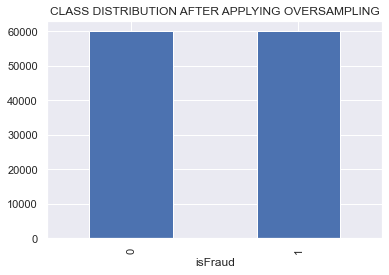

In [77]:
pd.Series(y_resampled).value_counts().plot(kind='bar',title='CLASS DISTRIBUTION AFTER APPLYING OVERSAMPLING', xlabel='isFraud')


#### Model : Logistic Regression

In [78]:
#Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [79]:
classifier=LogisticRegression()
classifier.fit(train_x,train_y)

LogisticRegression()

In [80]:
#Predicting on Train data
predt_log = classifier.predict(train_x)
#Accuracy on Train data
print("Train data Accuracy is:", np.mean(predt_log==train_y))

Train data Accuracy is: 0.9156785714285715


In [81]:
#Predicting on test data
preds_log = classifier.predict(test_x)
#Accuracy on Test data
print("Test data Accuracy is:", np.mean(preds_log==test_y))

Test data Accuracy is: 0.9161666666666667


In [82]:
# Evaluating model
CM_log = confusion_matrix(test_y,preds_log)
CM_log

array([[15603,  2557],
       [  461, 17379]], dtype=int64)

In [83]:
CR_log=classification_report(preds_log,test_y)
print(CR_log)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     16064
           1       0.97      0.87      0.92     19936

    accuracy                           0.92     36000
   macro avg       0.92      0.92      0.92     36000
weighted avg       0.92      0.92      0.92     36000



#### Model : Decision Tree

In [84]:
#Train Model
DT = DecisionTreeClassifier()
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
model_dt.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

No. Of Leaves: 89


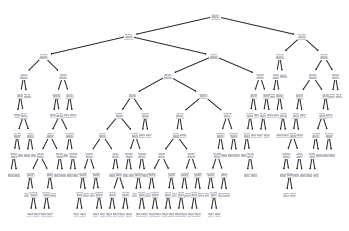

In [85]:
#Plot the Decision Tree
tree.plot_tree(model_dt);
print("No. Of Leaves:",model_dt.get_n_leaves())

In [86]:
#Predicting on test data
preds_dt = model_dt.predict(test_x)
#Accuracy on Test data
print("Test data Accuracy is:", np.mean(preds_dt==test_y))

Test data Accuracy is: 0.9983055555555556


In [87]:
# Evaluating model
CM_dt = confusion_matrix(test_y,preds_dt)
CM_dt

array([[18130,    30],
       [   31, 17809]], dtype=int64)

In [88]:
CR_dt=classification_report(preds_dt,test_y)
print(CR_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18161
           1       1.00      1.00      1.00     17839

    accuracy                           1.00     36000
   macro avg       1.00      1.00      1.00     36000
weighted avg       1.00      1.00      1.00     36000



#### Model : Random Forest

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [90]:
# Train model
parametersRF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
model_rf= RF.fit(train_x, train_y)
 
# Predict on testing set
preds_rf = RF.predict(test_x)
 
     
fprRF, recallRF, thresholdsRF = roc_curve(test_y, preds_rf)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Area Under Curve":AUC_RF}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Area Under Curve : 
 0.9998623348017621


In [91]:
# Evaluating model
CM_rf = confusion_matrix(test_y,preds_rf)
CM_rf

array([[18155,     5],
       [    0, 17840]], dtype=int64)

In [92]:
CR_rf=classification_report(preds_rf,test_y)
print(CR_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18155
           1       1.00      1.00      1.00     17845

    accuracy                           1.00     36000
   macro avg       1.00      1.00      1.00     36000
weighted avg       1.00      1.00      1.00     36000



#### Model : XGBoost Classifier

In [93]:
# Training model
model3 = XGBClassifier()
model3.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
#Predicting on test data
preds_xg= model3.predict(test_x)
#Accuracy on train data
print('Test data Accuracy is:',np.mean(preds_xg==test_y))

Test data Accuracy is: 0.9998611111111111


In [95]:
# Evaluating model
CM_xg = confusion_matrix(test_y,preds_xg)
CM_xg

array([[18155,     5],
       [    0, 17840]], dtype=int64)

In [96]:
CR_xg=classification_report(preds_xg,test_y)
print(CR_xg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18155
           1       1.00      1.00      1.00     17845

    accuracy                           1.00     36000
   macro avg       1.00      1.00      1.00     36000
weighted avg       1.00      1.00      1.00     36000



#### Model : Light GBM Classifier

In [97]:
import lightgbm as lgb
model4 = lgb.LGBMClassifier()
model4.fit(train_x,train_y)

LGBMClassifier()

In [98]:
#Predicting on Train data
predt_lg = model4.predict(train_x)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(predt_lg==train_y))

Train data Accuracy is: 1.0


In [99]:
#Predicting on Test data
preds_lg = model4.predict(test_x)
#Accuracy on Test data
print('Test data Accuracy is:',np.mean(preds_lg==test_y))

Test data Accuracy is: 0.9998055555555555


In [100]:
# Evaluating model
CM_lg = confusion_matrix(test_y,preds_lg)
CM_lg

array([[18153,     7],
       [    0, 17840]], dtype=int64)

In [101]:
CR_lg=classification_report(preds_lg,test_y)
print(CR_lg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18153
           1       1.00      1.00      1.00     17847

    accuracy                           1.00     36000
   macro avg       1.00      1.00      1.00     36000
weighted avg       1.00      1.00      1.00     36000



#### Model: Gaussian Navie Bayes

In [102]:
#Importing Libraries
from sklearn.naive_bayes import GaussianNB as GB
classifier_gb = GB()
classifier_gb.fit(train_x,train_y)

GaussianNB()

In [103]:
#Predicting on test data
preds_gb = classifier_gb.predict(test_x)
#Accuracy on Test data
print("Test data Accuracy is:", np.mean(preds_gb==test_y))

Test data Accuracy is: 0.7285833333333334


In [104]:
# Evaluating model
CM_gb = confusion_matrix(test_y,preds_gb)
CM_gb

array([[17269,   891],
       [ 8880,  8960]], dtype=int64)

In [105]:
CR_gb=classification_report(preds_gb,test_y)
print(CR_gb)

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     26149
           1       0.50      0.91      0.65      9851

    accuracy                           0.73     36000
   macro avg       0.73      0.78      0.71     36000
weighted avg       0.83      0.73      0.74     36000



#### Model 6: K-Fold Cross Validation

In [106]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
logreg=LogisticRegression()
skf=StratifiedKFold(n_splits=5)
score1=cross_val_score(logreg,test_x,test_y,cv=skf)
print("Cross Validation Scores are {}".format(score1))
print("Average Cross Validation score :{}".format(score1.mean()))

Cross Validation Scores are [0.90819444 0.90541667 0.91069444 0.90277778 0.89652778]
Average Cross Validation score :0.9047222222222222


#### Model7: AdaBoost Classification

In [107]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=96)
pred_ada=clf.fit(test_x,test_y)
print("Test data Accuracy:",pred_ada.score(test_x,test_y))
score=cross_val_score(clf,test_x,test_y)
print("Cross Validation Scores are {}".format(score))

Test data Accuracy: 0.9961666666666666
Cross Validation Scores are [0.99569444 0.99638889 0.99638889 0.99611111 0.99541667]


#### Model8: Baggigng Classification

In [108]:
from sklearn.ensemble import BaggingClassifier
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, test_x, test_y, cv=kfold)
print(results.mean())

0.9988611111111112


#### Comparing the models: Balanced data

In [109]:
print("Accuracy of Logistic Regression:",np.mean(preds_log==test_y))
print("Accuracy of Decision Tree:",np.mean(preds_dt==test_y))
print("Accuracy of Random Forest:",AUC_RF)
print("Accuracy of XGBoost Classifier:",np.mean(preds_xg==test_y))
print("Accuracy of Light GBM Classifier:",np.mean(preds_lg==test_y))
print("Accuracy of Gaussian Navie Bayes:",np.mean(preds_gb==test_y))
print("Accuracy of K-Fold Cross Validation:",format(score1.mean()))
print("Accuracy of AdaBoost Classification:",pred_ada.score(test_x,test_y))
print("Accuracy of Baggigng Classification:",results.mean())

Accuracy of Logistic Regression: 0.9161666666666667
Accuracy of Decision Tree: 0.9983055555555556
Accuracy of Random Forest: 0.9998623348017621
Accuracy of XGBoost Classifier: 0.9998611111111111
Accuracy of Light GBM Classifier: 0.9998055555555555
Accuracy of Gaussian Navie Bayes: 0.7285833333333334
Accuracy of K-Fold Cross Validation: 0.9047222222222222
Accuracy of AdaBoost Classification: 0.9961666666666666
Accuracy of Baggigng Classification: 0.9988611111111112


#### From above Accuracy Comparision, We got good accuracy in all Algorithms except Logistic Regression, Gaussian Navie Bayes, K-Fold Cross Validation.

#### As RANDOM FOREST accuracy is very close to 100% however we finalised random forest as our Final Model.

#### Accuracy of Random Forest: 0.9998623348017621

True negatives:  18155 

False positives:  5 

False negatives:  0 

True Positives:  17840

### Final Model with Random Forest Classifier

In [110]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve


RandomForest_Deploy = RandomForestClassifier(class_weight = 'balanced',
                                       max_depth = 7,
                                       max_features = 4,
                                       min_samples_split = 2,
                                       n_estimators = 50,
                                       random_state = 42).fit(train_x,train_y)

y_pred = RandomForest_Deploy.predict(test_x)
y_train_pred = RandomForest_Deploy.predict(train_x)

RandomForest_Deploy_f1 = f1_score(test_y, y_pred)
RandomForest_Deploy_acc = accuracy_score(test_y, y_pred)
RandomForest_Deploy_recall = recall_score(test_y, y_pred)
RandomForest_Deploy_auc = roc_auc_score(test_y, y_pred)
RandomForest_Deploy_pre = precision_score(test_y, y_pred)
precision, recall, _ = precision_recall_curve(test_y, y_pred)
RandomForest_Deploy_recall_auc = auc(recall, precision)

print("RandomForest_Deploy")
print ("------------------")
eval("RandomForest_Deploy, train_x, test_x")

RandomForest_Deploy
------------------


(RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=4,
                        n_estimators=50, random_state=42),
         type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
 67451      4  5016884.33     5016884.33            0.00            0.00   
 81497      4   113829.89      113829.89            0.00            0.00   
 84310      1  8537861.24     8537861.24            0.00            0.00   
 100077     1   282500.69      282500.69            0.00        27806.82   
 73476      4  3042111.54     3042111.54            0.00            0.00   
 ...      ...         ...            ...             ...             ...   
 110268     1  2479940.21     2479940.21            0.00            0.00   
 119879     1   458361.83      458361.83            0.00            0.00   
 103694     1  5489302.04     5489302.04            0.00      1356390.81   
 860        4   595846.21      118425.71            0.00        46257.07   
 15795      3     6737.87  

In [111]:
train_x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
67451,4,5016884.33,5016884.33,0.0,0.00,0.00,0,5016884.33,0.00,28.166667
81497,4,113829.89,113829.89,0.0,0.00,0.00,0,113829.89,0.00,3.250000
84310,1,8537861.24,8537861.24,0.0,0.00,8537861.24,0,8537861.24,8537861.24,29.208333
100077,1,282500.69,282500.69,0.0,27806.82,310307.51,0,282500.69,282500.69,24.166667
73476,4,3042111.54,3042111.54,0.0,0.00,0.00,0,3042111.54,0.00,11.208333


In [112]:
test_x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
71787,4,57466.42,57466.42,0.0,0.00,0.00,0,57466.42,0.00,12.375000
67218,1,119.65,119.65,0.0,1183575.58,1183695.22,0,119.65,119.64,27.208333
54066,0,202720.09,9242213.72,9444933.8,275349.50,146802.81,0,-202720.08,-128546.69,0.333333
7168,4,1372129.53,0.00,0.0,3302288.80,4674418.34,0,0.00,1372129.54,0.416667
29618,1,37128.79,20354.00,0.0,905741.37,1079972.85,0,20354.00,174231.48,0.333333


In [113]:
import pickle
# open a file, where you ant to store the data
# dump information to that file
random_forest_classifier = pickle.dump(RandomForest_Deploy, open('random_forest_model', 'wb'))

In [114]:
from pickle import dump
from pickle import load

In [115]:
# save the model to disk
random_forest_classifier= 'random_forest_model.sav'
dump(RandomForest_Deploy, open('random_forest_model', 'wb'))

In [116]:
# load the model from disk
loaded_model = load(open('random_forest_model', 'rb'))

result = loaded_model.score(test_x ,test_y)
print(result)

0.9959722222222223


In [117]:
test_y.head(50)

71787     1
67218     1
54066     0
7168      0
29618     0
101425    1
20441     0
2662      0
20371     0
108151    1
15315     0
23538     0
113198    1
201       0
52090     0
15394     0
88288     1
46590     0
14005     0
13752     0
119830    1
82401     1
1749      0
114630    1
11203     0
59654     0
35527     0
101797    1
11980     0
61754     1
93022     1
13664     0
113757    1
59279     0
61523     1
31154     0
75639     1
47217     0
16528     0
117741    1
78535     1
114609    1
103219    1
2619      0
57662     0
19071     0
72648     1
17792     0
27053     0
110311    1
Name: isFraud, dtype: int64

In [118]:
test_y.value_counts()

0    18160
1    17840
Name: isFraud, dtype: int64

In [119]:
train_y.value_counts()

1    42160
0    41840
Name: isFraud, dtype: int64